In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import DataLoader, Dataset

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
# from tqdm import tqdm
# import time
# import copy

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import seaborn as sns

# importing the statistics module
import statistics

import joblib

# Setting

In [2]:
# setting split and path
split = 'split5'
path = "../5-fold_new/DATA/"
train_path = "{}/{}/train/train_{}.csv".format(path,split,split)
# test_path =  "{}/{}/test/test_{}.csv".format(path,split,split)
test_path =  "{}/test.csv".format(path)
valid_path = "{}/{}/val/val_{}.csv".format(path,split,split)

In [3]:
print(train_path)
# Load the train set
train_data = pd.read_csv(train_path)
print(train_data.shape)
x_train = train_data[train_data.columns[2:]]
print(x_train.shape)
y_train = train_data[train_data.columns[1]]
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)
print(test_path)
# Load the test set
test_data = pd.read_csv(test_path)
print(test_data.shape)
x_test = test_data[test_data.columns[3:]]
print(x_test.shape)
y_test = test_data[test_data.columns[2]]
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)
print(valid_path)
# Load the validation set
val_data = pd.read_csv(valid_path)
print(val_data.shape)
x_val = val_data[val_data.columns[2:]]
print(x_val.shape)
y_val = val_data[val_data.columns[1]]
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

# StandardScaler
sc = StandardScaler()
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
x_val = sc.fit_transform(x_val)

../5-fold_new/DATA//split5/train/train_split5.csv
(364, 32)
(364, 30)
['B' 'M']
../5-fold_new/DATA//test.csv
(114, 33)
(114, 30)
['B' 'M']
../5-fold_new/DATA//split5/val/val_split5.csv
(91, 32)
(91, 30)
['B' 'M']


# Grid Search

In [4]:
param_dist = {
    'n_estimators': [120,130,140],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2,4,6],
    'min_samples_split': [5,7,9],
    'min_samples_leaf': [1,3,5],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Define grid search object
cv_rf = GridSearchCV(RandomForestClassifier(), param_dist)

cv_rf.fit(x_train, y_train)

# save the model
path = 'rf_model/rf_parameter_{}.txt'.format(split)
with open(path, 'w') as f:
    f.write(str(cv_rf.best_params_))
    print("save parameter at {}".format(path))
joblib.dump(cv_rf, 'rf_model/rf_{}.joblib'.format(split))

save parameter at rf_model/rf_parameter_split5.txt


['rf_model/rf_split5.joblib']

In [5]:
print('Best Parameters using grid search: \n', cv_rf.best_params_)
print('Best score:', cv_rf.best_score_)

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 120}
Best score: 0.9697869101978689


# evaluate

In [6]:
# split_num = 1
# split = "split{}".format(split_num)
loaded_model = joblib.load('rf_model/rf_{}.joblib'.format(split))

In [7]:
# # tn, fp, fn, tp = each_index(cm)
def each_index(metrix):
    TN = metrix[0][0]
    FP = metrix[0][1]
    FN = metrix[1][0]
    TP = metrix[1][1]
    return TN, FP, FN, TP
def sensitivity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate sensitivity
    sensitivity = TP / (TP + FN) * 100
    print("Sensitivity: %.2f%%" % sensitivity)
    return sensitivity
def specificity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate specificity
    specificity = TN / (TN + FP) * 100
    print("Specificity: %.2f%%" % specificity)
    return specificity
def accuracy(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    accuracy = ((TP + TN) / (TP + TN + FP + FN)) *100
    print("Accuracy: %.2f%%" % accuracy)
    return accuracy
def precision(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    precision = (TP / (TP + FP)) *100
    print("Precision: %.2f%%" % precision)
    return precision
def f1(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate f1
    recall = sensitivity(metrix)
    pre = precision(metrix)
    f1 = ((2*pre*recall) / (pre+recall))
    print("F1: %.2f%%" % f1)
    return f1

split5
############## validate set ################
Confusion Matrix
----------------
[[65  3]
 [ 1 22]] 

----------------
split5
Sensitivity: 95.65%
Specificity: 95.59%
Accuracy: 95.60%
Precision: 88.00%
Sensitivity: 95.65%
Precision: 88.00%
F1: 91.67%


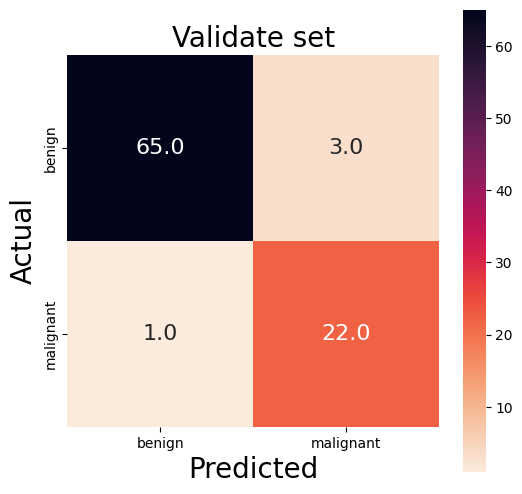

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [21 47]] 

----------------
split5
Sensitivity: 69.12%
Specificity: 100.00%
Accuracy: 81.58%
Precision: 100.00%
Sensitivity: 69.12%
Precision: 100.00%
F1: 81.74%


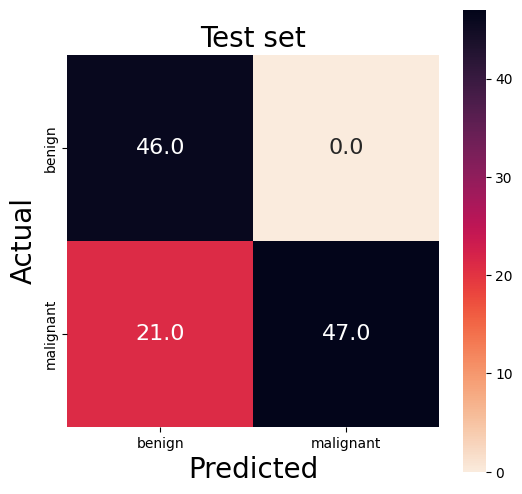

---------------------------------------
AUC validate: 0.9562
AUC test: 0.8456


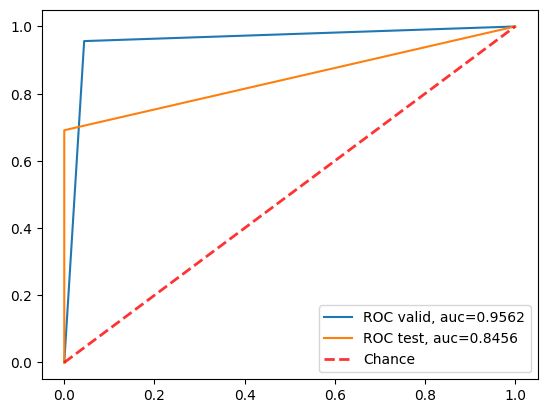

save score at rf_model/rf_score_split5.txt


In [8]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = loaded_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
print(split)
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)
    
# plot confusion matrix
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Validate set", fontsize=20)
ax = sns.heatmap(cm_val, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.savefig('rf_model/validate_cm_{}.png'.format(split))
plt.show()
################# test set ##################
print("################# test set ##################")
y_pred_test = loaded_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
print(split)
sen_test = sensitivity(cm_test)
spec_test = specificity(cm_test)
acc_test = accuracy(cm_test)
pre_test = precision(cm_test)
f1_score_test = f1(cm_test)

# plot confusion matrix
# label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Test set", fontsize=20)
ax = sns.heatmap(cm_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.savefig('rf_model/test_cm_{}.png'.format(split))
plt.show()
    
################## plot ROC curve ########################
fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val)
auc1 = metrics.roc_auc_score(y_val,  y_pred_val)
fpr2, tpr2, thr2 = metrics.roc_curve(y_test,  y_pred_test)
auc2 = metrics.roc_auc_score(y_test,  y_pred_test)
gmeans2 = np.sqrt(tpr2 * (1-fpr2))
ix2 = np.argmax(gmeans2)
import sklearn.metrics as metrics
    
# print('Best Threshold ' + str(i) + ' =%f, G-Mean=%.4f' % (thr[ix], gmeans[ix]))
# print('FPR: %.4f, TPR: %.4f' %(fpr[ix], tpr[ix]))
# thresholds_ = thr[ix]
print("---------------------------------------")
print("AUC validate: %.4f" % auc1)
print("AUC test: %.4f" % auc2)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc1))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc2))
# plt.plot(fpr3,tpr3,label="ROC fold 3, auc="+str("%.4f" % auc3))
# plt.plot(fpr4,tpr4,label="ROC fold 4, auc="+str("%.4f" % auc4))
# plt.plot(fpr5,tpr5,label="ROC fold 5, auc="+str("%.4f" % auc5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

plt.legend(loc=4)
plt.savefig('rf_model/ROC_{}.png'.format(split))
plt.show()

path = "rf_model/rf_score_{}.txt".format(split)
with open(path, 'w') as f:
    f.write("validate\n")
    f.write("sen:" + str(sen_val) + "\n")
    f.write("spec:" + str(spec_val) + "\n")
    f.write("acc:" + str(acc_val) + "\n")
    f.write("pre:" + str(pre_val) + "\n")
    f.write("f1:" + str(f1_score_val) + "\n")
    f.write("\ntest\n")
    f.write("sen:" + str(sen_test) + "\n")
    f.write("spec:" + str(spec_test) + "\n")
    f.write("acc:" + str(acc_test) + "\n")
    f.write("pre:" + str(pre_test) + "\n")
    f.write("f1:" + str(f1_score_test) + "\n")
    f.write("\nROC\n")
    f.write("validate:" + str(auc1) + "\n")
    f.write("test:" + str(auc2) + "\n")
    print("save score at {}".format(path))
    
##########################################################